In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statistics
import scipy.stats as st

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
pd.DataFrame(data.isnull().sum())

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

* If the data type of the column is "object" then fill the Nan values with mode of the column
* If the data type of the column is "int" or "float" then fill the Nan values with mean/median of the column

In [8]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
data['Outcome'].mode() #yes- 1 and no-0

0    0
Name: Outcome, dtype: int64

In [10]:
data['Outcome'].mode()[0]

0

In [14]:
#None,0
#object format data-- mode of the column
#num format data-- either by mean or median
#let's say, i have to fill the col1 null data by mode:-- the col is categorical--
#data['col1'].fillna(data['col1'].mode()[0])
#let's say, i have to fill the col1 null data by mean:-- the col is numerical
#data['col1'].fillna(data['col1'].mean())

* 25th percentile data-- after sorting the points in ascending manner-- whichever data point occurs on the 25th position-- that data point will known as 1st quartrile data or 25th percentile 

* 50 percentile data--  after sorting the points in ascending manner-- whichever data point occurs on the 50th position-- that data point will known as 2nd quartrile data or 50th percentile or median of the column

* 75th percentile data--after sorting the points in ascending manner-- whichever data point occurs on the 75th position-- that data point will known as 3rd quartrile data or 75th percentile

In [11]:
#measure of central tendency and spread - descriptive statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
data['Pregnancies'].median()

3.0

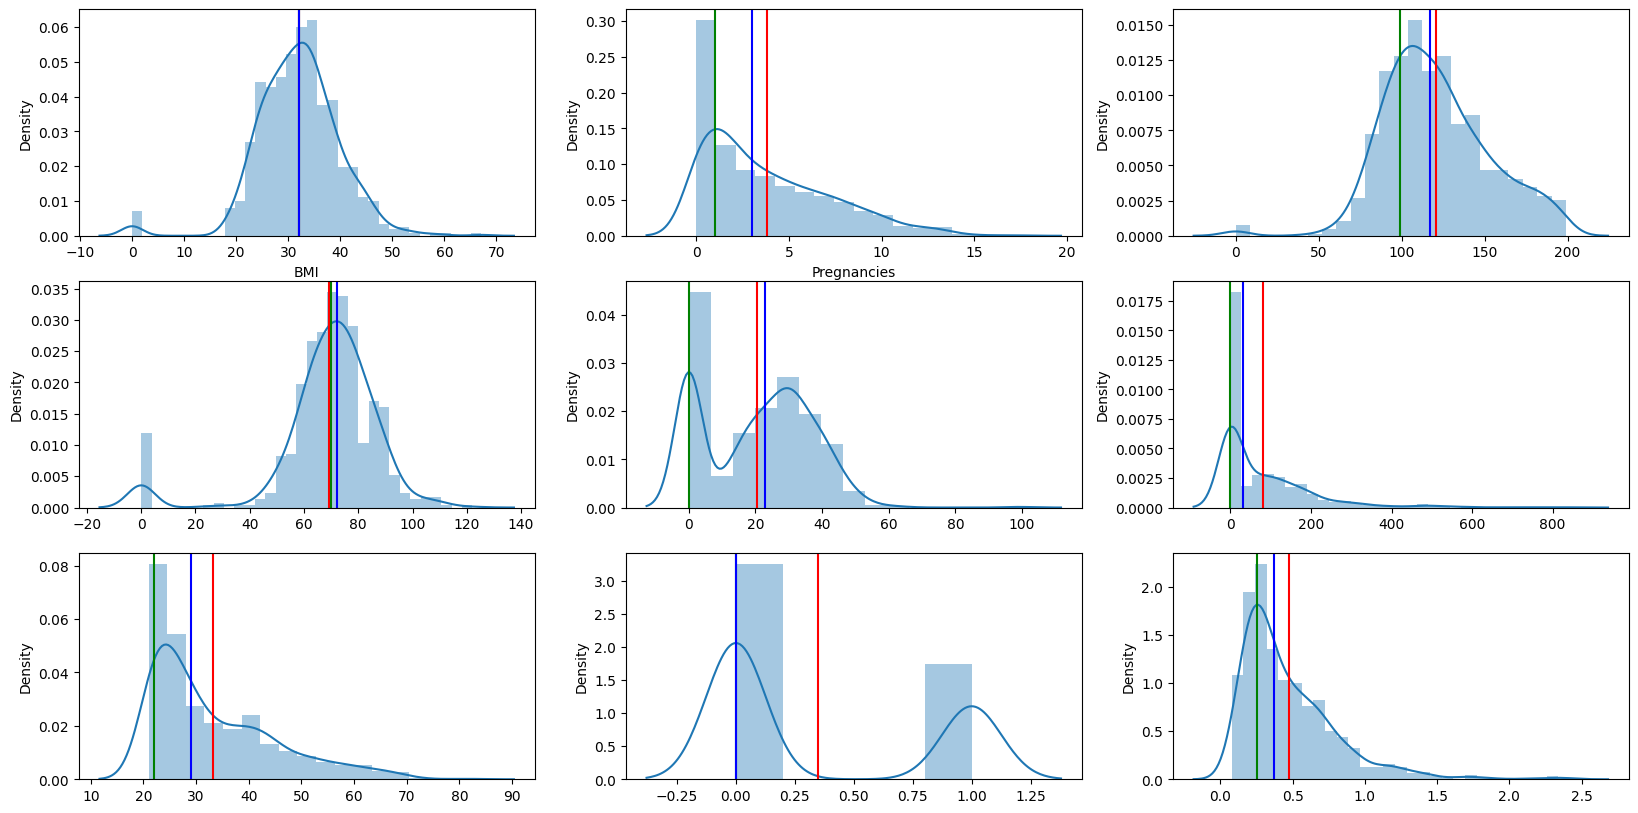

In [13]:
#measure of symmetry 
fig, axes = plt.subplots(3,3, figsize=(20,10))

plt.subplot(3,3,1)
sns.distplot(x=data['BMI'])
plt.axvline(x=data['BMI'].mean(), color='red')
plt.axvline(x=data['BMI'].mode()[0], color='green')
plt.axvline(x=data['BMI'].median(), color='blue')
plt.xlabel('BMI')

plt.subplot(3,3,2)
sns.distplot(x=data['Pregnancies'])
plt.axvline(x=data['Pregnancies'].mean(), color='red')
plt.axvline(x=data['Pregnancies'].mode()[0], color='green')
plt.axvline(x=data['Pregnancies'].median(), color='blue')
plt.xlabel('Pregnancies')

plt.subplot(3,3,3)
sns.distplot(x=data['Glucose'])
plt.axvline(x=data['Glucose'].mean(), color='red')
plt.axvline(x=data['Glucose'].mode()[0], color='green')
plt.axvline(x=data['Glucose'].median(), color='blue')


plt.subplot(3,3,4)
sns.distplot(x=data['BloodPressure'])
plt.axvline(x=data['BloodPressure'].mean(), color='red')
plt.axvline(x=data['BloodPressure'].mode()[0], color='green')
plt.axvline(x=data['BloodPressure'].median(), color='blue')

plt.subplot(3,3,5)
sns.distplot(x=data['SkinThickness'])
plt.axvline(x=data['SkinThickness'].mean(), color='red')
plt.axvline(x=data['SkinThickness'].mode()[0], color='green')
plt.axvline(x=data['SkinThickness'].median(), color='blue')

plt.subplot(3,3,6)
sns.distplot(x=data['Insulin'])
plt.axvline(x=data['Insulin'].mean(), color='red')
plt.axvline(x=data['Insulin'].mode()[0], color='green')
plt.axvline(x=data['Insulin'].median(), color='blue')

plt.subplot(3,3,7)
sns.distplot(x=data['Age'])
plt.axvline(x=data['Age'].mean(), color='red')
plt.axvline(x=data['Age'].mode()[0], color='green')
plt.axvline(x=data['Age'].median(), color='blue')
#plt.xlabel()

plt.subplot(3,3,8)
sns.distplot(x=data['Outcome'])
plt.axvline(x=data['Outcome'].mean(), color='red')
plt.axvline(x=data['Outcome'].mode()[0], color='green')
plt.axvline(x=data['Outcome'].median(), color='blue')

plt.subplot(3,3,9)
sns.distplot(x=data['DiabetesPedigreeFunction'])
plt.axvline(x=data['DiabetesPedigreeFunction'].mean(), color='red')
plt.axvline(x=data['DiabetesPedigreeFunction'].mode()[0], color='green')
plt.axvline(x=data['DiabetesPedigreeFunction'].median(), color='blue')


plt.show()

In [20]:
#right skewed distribution/ positive skewed data-- from left to right--- Mode, median, mean
#left skewed distribution-- from left to right--- Mean, median, mode

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

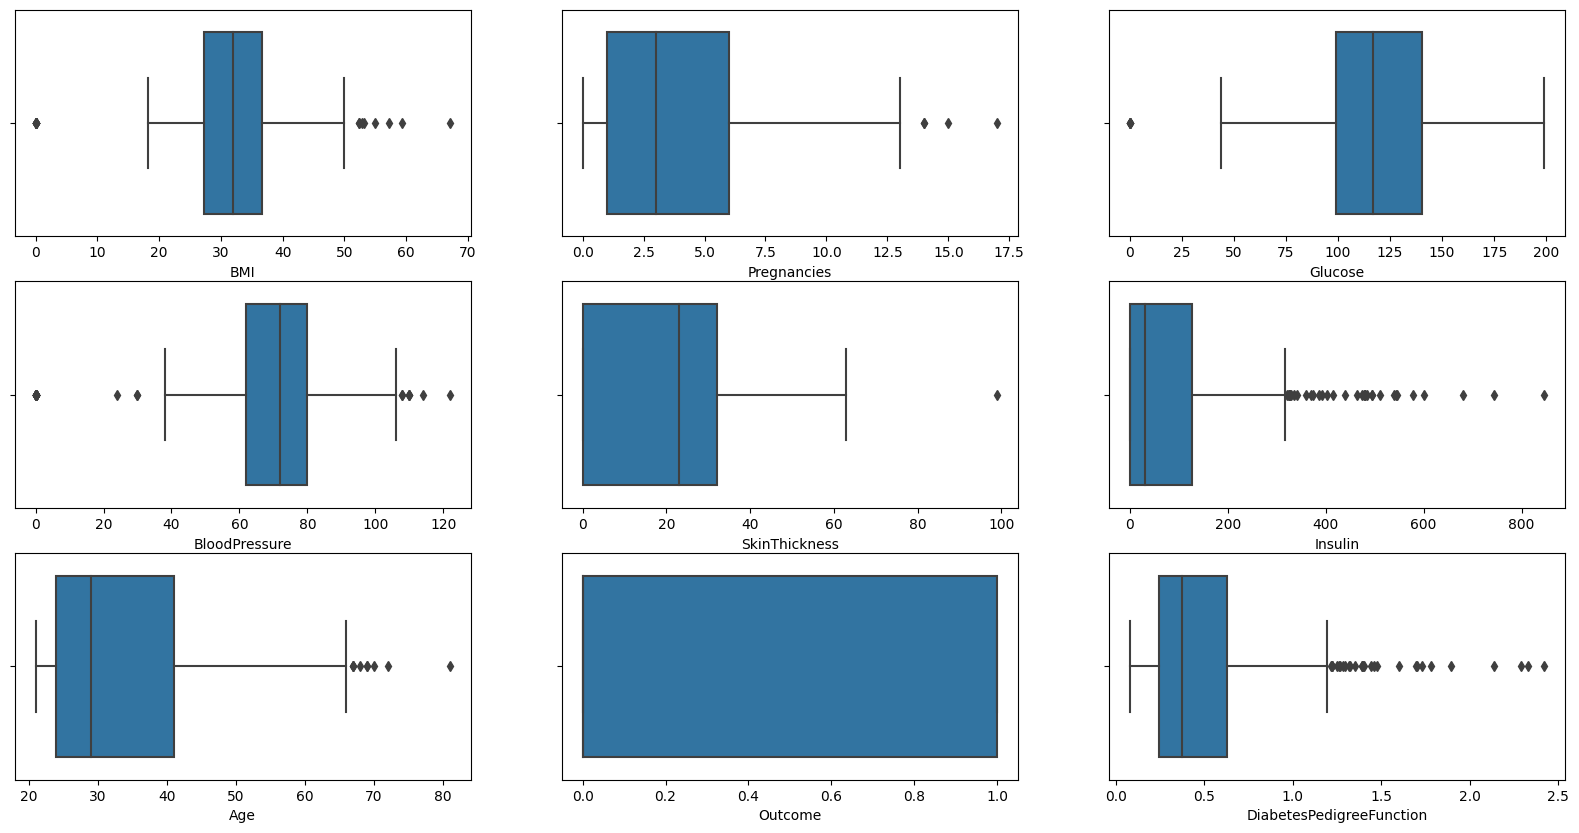

In [14]:
#measure of peakedness
fig, axes = plt.subplots(3,3, figsize=(20,10))

plt.subplot(3,3,1)
sns.boxplot(x=data['BMI'])

plt.subplot(3,3,2)
sns.boxplot(x=data['Pregnancies'])

plt.subplot(3,3,3)
sns.boxplot(x=data['Glucose'])

plt.subplot(3,3,4)
sns.boxplot(x=data['BloodPressure'])

plt.subplot(3,3,5)
sns.boxplot(x=data['SkinThickness'])

plt.subplot(3,3,6)
sns.boxplot(x=data['Insulin'])

plt.subplot(3,3,7)
sns.boxplot(x=data['Age'])

plt.subplot(3,3,8)
sns.boxplot(x=data['Outcome'])

plt.subplot(3,3,9)
sns.boxplot(x=data['DiabetesPedigreeFunction'])

* iqr= q3-q1

* upper limit: q3+1.5*iqr--- outlier

* lower limit: q1-1.5*iqr--- outlier

In [15]:
q1 = data['BMI'].quantile(0.25)
q3 = data['BMI'].quantile(0.75)

In [16]:
q1, q3

(27.3, 36.6)

In [17]:
iqr = q3-q1
iqr

9.3

In [18]:
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
lower_limit,upper_limit

(13.35, 50.550000000000004)

In [19]:
data=data[(data['BMI']>lower_limit) & (data['BMI']<upper_limit)]

<AxesSubplot:xlabel='BMI'>

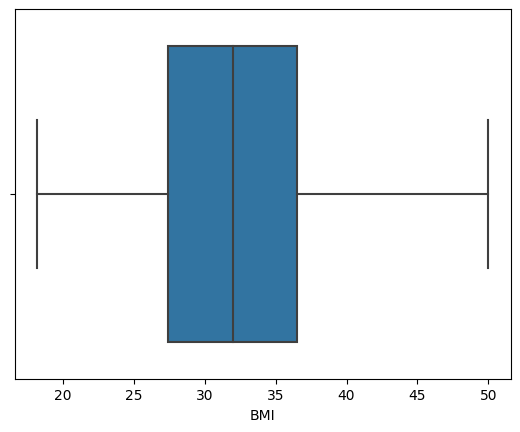

In [20]:
sns.boxplot(x=data['BMI'])

In [21]:
#sampling 
diabetic = data.loc[(data["Outcome"] == 1)]
non_diabetic = data.loc[(data['Outcome'] == 0)]
diabetic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               260 non-null    int64  
 1   Glucose                   260 non-null    int64  
 2   BloodPressure             260 non-null    int64  
 3   SkinThickness             260 non-null    int64  
 4   Insulin                   260 non-null    int64  
 5   BMI                       260 non-null    float64
 6   DiabetesPedigreeFunction  260 non-null    float64
 7   Age                       260 non-null    int64  
 8   Outcome                   260 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 20.3 KB


In [22]:
non_diabetic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 1 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               489 non-null    int64  
 1   Glucose                   489 non-null    int64  
 2   BloodPressure             489 non-null    int64  
 3   SkinThickness             489 non-null    int64  
 4   Insulin                   489 non-null    int64  
 5   BMI                       489 non-null    float64
 6   DiabetesPedigreeFunction  489 non-null    float64
 7   Age                       489 non-null    int64  
 8   Outcome                   489 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 38.2 KB


## Problem Statement - For inferential Statistical Analysis

1. What is the average BMI for patients with Diabetes

2. The objective is to calculate the mean BMI of patients with diabetes, and calculate a 95% confidence interval for mean BMI of patients with diabetes. 

<AxesSubplot:ylabel='Density'>

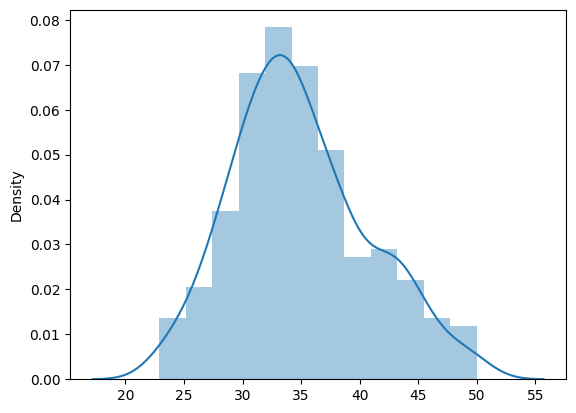

In [23]:
sns.distplot(x=diabetic['BMI'])

In [24]:
#calculating the confidence interval

sample_mean = np.mean(diabetic['BMI'])
sample_std = statistics.stdev(diabetic['BMI'])
sample_std_err = st.sem(diabetic['BMI'])#Standard error is calculated by dividing the standard deviation of the sample by the square root of the sample size.

print(sample_mean, sample_std, sample_std_err)

34.91653846153846 5.782866079639065 0.35863812967648395


In [28]:
print(sample_std/(np.sqrt(diabetic.shape[0])))

0.35863812967648395


In [28]:
#sample_std_err=sd of the sample/square root of the number of samples

In [29]:
Z_value = st.norm.ppf(0.95)

lowerCI = sample_mean - (Z_value * sample_std_err)
upperCI = sample_mean + (Z_value * sample_std_err)

print(Z_value)
print([lowerCI, upperCI])

1.6448536269514722
[34.326631233177004, 35.50644568989991]


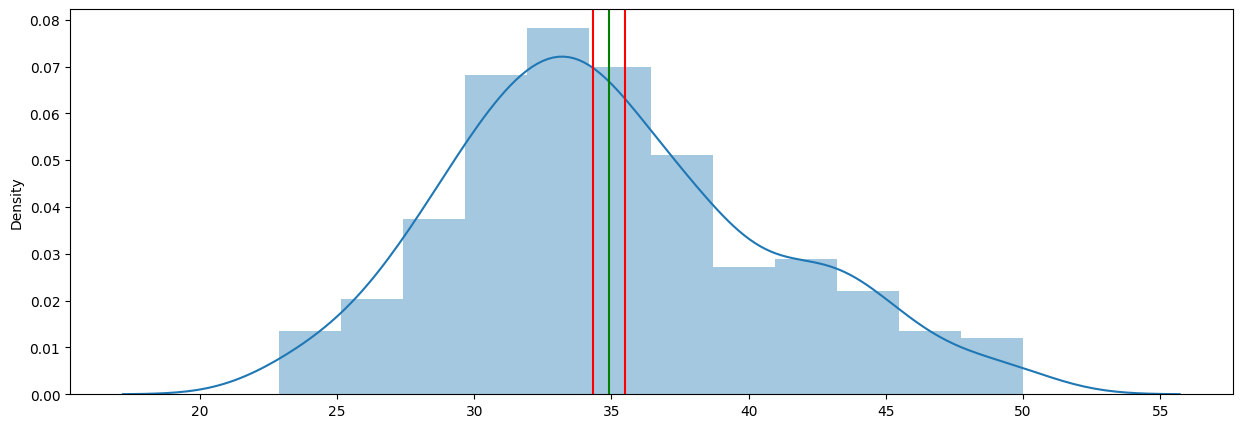

In [30]:
plt.figure(figsize=(15,5))
sns.distplot(x=diabetic['BMI'])
plt.axvline(x=lowerCI, color='red')
plt.axvline(x=upperCI, color='red')
plt.axvline(x=sample_mean, color='green')

## Hypotheses Testing

1. Null-Hypothesis - The Average BMI of diabetic patients is 34.9
2. Alternate Hypothesis - The average BMI of diabetic patients is not 34.9 

In [31]:
#z-test Hypotheses Testing
random_sample = diabetic['BMI'][100:150]
random_sample

280    37.9
283    30.4
284    27.0
287    45.6
291    36.6
292    43.3
293    40.5
296    28.0
298    36.6
300    32.3
301    31.6
306    25.5
308    30.5
309    32.9
312    26.6
314    35.9
317    30.5
319    23.5
321    31.6
322    27.4
323    26.8
326    35.1
328    45.5
332    43.3
337    31.2
338    34.2
339    39.9
349    41.0
355    30.4
356    33.3
357    39.9
359    36.5
360    31.2
363    38.5
366    27.6
369    32.8
370    38.4
375    39.2
378    48.3
386    32.3
387    43.3
388    32.0
391    45.7
394    32.9
397    34.3
399    34.9
400    32.0
402    35.0
404    32.9
406    28.9
Name: BMI, dtype: float64

In [32]:
mean_random_sample = np.mean(random_sample)
mean_random_sample

34.63

In [33]:
from statsmodels.stats.weightstats import ztest

z_test_score, p_value = ztest(random_sample, value=sample_mean)
print(z_test_score, p_value)  

-0.344121730121843 0.7307547415008555


## Failed to reject the null hyptheses.